In [ ]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 2.8 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids

In [ ]:
df = pd.read_excel('Data COVID JABAR.xlsx','Sheet3',usecols="B:C")
df.head()

,Terkonfirmasi,Meninggal
0,434,634
1,188,307
2,316,571
3,242,206
4,57,328


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
x_scaled = scaler.transform(df)

In [ ]:
x_scaled

array([[ 4.29171074e-02,  1.22459110e-01],
       [-1.80862632e-01, -4.98036524e-01],
       [-6.44243936e-02,  2.91407954e-03],
       [-1.31740250e-01, -6.89688081e-01],
       [-3.00029891e-01, -4.58188181e-01],
       [-2.78197722e-01, -6.49839737e-01],
       [-3.27320103e-01,  7.54339985e-01],
       [-2.15430234e-01,  1.35965530e+00],
       [-3.10036302e-01,  3.71036872e-01],
       [-2.26346319e-01,  2.80178582e+00],
       [-3.07307281e-01, -5.30294707e-01],
       [-3.19133040e-01, -5.73938131e-01],
       [-3.30049125e-01, -7.84565089e-01],
       [-3.21862061e-01,  7.31230657e-02],
       [-2.23617297e-01, -5.13216845e-01],
       [-3.20042714e-01, -4.03159516e-01],
       [-3.11855650e-01, -7.39024125e-01],
       [-3.16404019e-01, -4.75266042e-01],
       [ 4.29528445e-01, -2.20995660e-01],
       [-3.30958798e-01, -8.05438031e-01],
       [ 2.56690435e-01,  9.28913680e-01],
       [ 1.37523176e-01, -3.31391836e-02],
       [-5.53276562e-02, -7.01073322e-01],
       [-2.

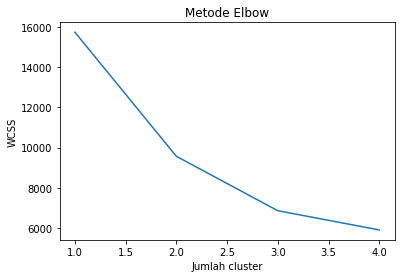

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
  kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', random_state=42)
  kmedoids.fit(df)
  wcss.append(kmedoids.inertia_)
plt.plot(range(1, 5), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kMedoids = KMedoids(n_clusters = 3, max_iter=300, metric='euclidean', random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [ ]:
prediksi = pd.DataFrame(y_kmed)
prediksi

,0
0,2
1,1
2,2
3,1
4,1
5,1
6,0
7,0
8,2
9,0


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.28956521973329263
0.6908849772349771
0.4949439383764136


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, max_iter=300, metric='euclidean', random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.459821430959625


In [ ]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 42)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

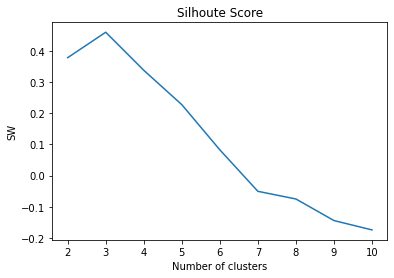

In [ ]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

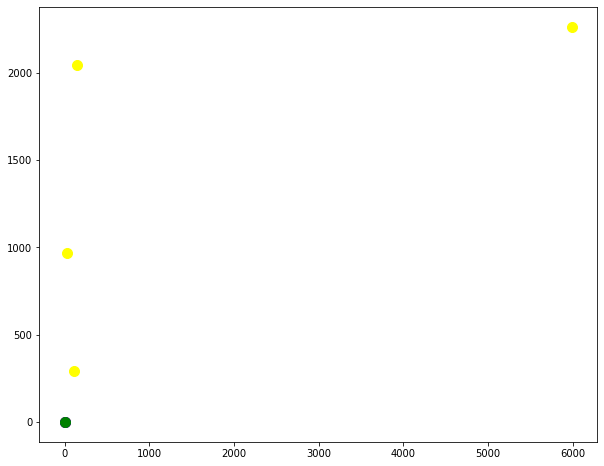

In [ ]:
plt.figure (figsize=(10, 8))
plt.scatter (x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter (x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter (x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter (kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')